# <center> k-Nearest Neighbor with Randomized Search
KNN classifier is trained on feature set 2

## <font color='royalblue'>Get the data

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 3.00880939,  0.26443017,  1.05370334, ...
X_32_val                  -> array([[-0.13964146,  0.53184264, -0.71694033, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[-0.1396414
X_32train_std             -> array([[-0.80277066, -0.49489511, -0.83240094, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[-0.006215
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 3.0088093
X_train                   -> array([[[-0.01174874, -0.00817356, -0.0042913 , ..
X_train_std               -> array([[-0.80277066, -0.49489511, -0.83240094, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([3, 5, 1, ..., 2, 4, 0])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 3, ..
y_32_train                -> array([5, 0, 2, ..., 4, 6, 6])
y_32_val                  -> array([2, 

In [3]:
print("Training data: ", X_32train_std.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_std), X_32test_std[18].shape, "arrays for SNR values:")
print(X_32test_std.keys())

Training data:  (80000, 32) and labels:  (80000,)
 
Test data:
Total 20 (4000, 32) arrays for SNR values:
dict_keys([0, -16, 2, 4, 6, 8, 12, 10, -20, -14, -18, 16, 18, -12, 14, -10, -8, -6, -4, -2])


## <font color='royalblue'>Train and test the classifier

In [19]:
#Train the classifier

from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': np.arange(1, 31, 2), 'metric': ['euclidean', 'cityblock']}

rand_search_cv = RandomizedSearchCV(KNeighborsClassifier(), params, verbose=1)

start = time()
rand_search_cv.fit(X_32train_std, y_32_train)
print("Randomized search took %.2f minutes "%((time() - start)//60))
print("   ")
print("Result of randomized search, best estimator:")
print(rand_search_cv.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 88.9min finished


Randomized search took 88.00 minutes 
   
Result of randomized search, best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cityblock',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')


In [6]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("*Test the classifier")
print("  ")
for snr in snrs:
    y_pred[snr] = rand_search_cv.predict(X_32test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("k-Nearest Neighbor's Accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR values

*Test the classifier
  
k-Nearest Neighbor's Accuracy on -20 dB SNR samples =  0.125
k-Nearest Neighbor's Accuracy on -18 dB SNR samples =  0.12375
k-Nearest Neighbor's Accuracy on -16 dB SNR samples =  0.12375
k-Nearest Neighbor's Accuracy on -14 dB SNR samples =  0.132
k-Nearest Neighbor's Accuracy on -12 dB SNR samples =  0.1425
k-Nearest Neighbor's Accuracy on -10 dB SNR samples =  0.15075
k-Nearest Neighbor's Accuracy on -8 dB SNR samples =  0.20975
k-Nearest Neighbor's Accuracy on -6 dB SNR samples =  0.28675
k-Nearest Neighbor's Accuracy on -4 dB SNR samples =  0.35025
k-Nearest Neighbor's Accuracy on -2 dB SNR samples =  0.369
k-Nearest Neighbor's Accuracy on 0 dB SNR samples =  0.46425
k-Nearest Neighbor's Accuracy on 2 dB SNR samples =  0.592
k-Nearest Neighbor's Accuracy on 4 dB SNR samples =  0.66175
k-Nearest Neighbor's Accuracy on 6 dB SNR samples =  0.68025
k-Nearest Neighbor's Accuracy on 8 dB SNR samples =  0.67725
k-Nearest Neighbor's Accuracy on 10 dB SNR samples =  

## <font color='royalblue'> Visualize classifier performance

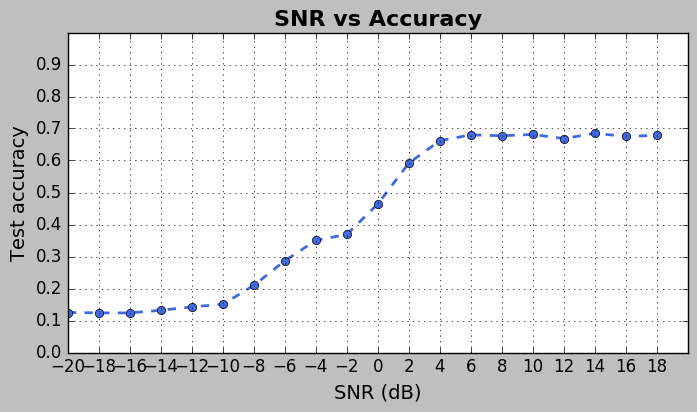

In [33]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [3]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
y_predicted = rand_search_cv.predict(X_32test_std[18])
conf_matrix = confusion_matrix(y_predicted, y_32_test[18]) 

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix Without Normalization")
print(df)

Confusion Matrix Without Normalization
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK    271     1      0     8     2     93     69   176
BPSK      1   493      0     0    20      9      8     8
CPFSK    33     1    482    60     1      9     13    37
GFSK     25     1     16   428     0     19     20    24
PAM4      1     3      0     0   474      8      4     1
QAM16    17     0      0     0     0    161    172    12
QAM64    15     1      0     0     2    158    181    17
QPSK    137     0      2     4     1     43     33   225


Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.44  0.00   0.00  0.01  0.00   0.15   0.11  0.28
BPSK   0.00  0.91   0.00  0.00  0.04   0.02   0.01  0.01
CPFSK  0.05  0.00   0.76  0.09  0.00   0.01   0.02  0.06
GFSK   0.05  0.00   0.03  0.80  0.00   0.04   0.04  0.05
PAM4   0.00  0.01   0.00  0.00  0.97   0.02   0.01  0.00
QAM16  0.05  0.00   0.00  0.00  0.00   0.44   0.48  0.03
QAM64  0.04  0.00   0.00  0.00  0.01   0.42   0.48  0.05
QPSK   0.31  0.00   0.00  0.01  0.00   0.10   0.07  0.51


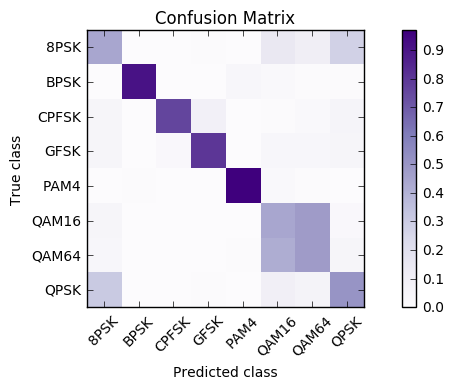

In [3]:
#Normalize the matrix

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

In [24]:
from sklearn.externals import joblib

joblib.dump(rand_search_cv, "knn4.1.pkl")

['knn4.1.pkl']

In [2]:
import pickle
from sklearn.externals import joblib
rand_search_cv = joblib.load("knn4.1.pkl")